In [1]:
# import requried packages 
import pandas as pd
from functions.analysis_helper import calculate_iqr
from functions.wrapper_helper import open_query, sparql_query_to_dataframe

# General group functions

#### global warming potential

In [2]:
# Global warming potential
endpoint = "http://localhost:3030/nice_food/sparql"
query_lca = open_query("queries/publication/global_warming_groups.rq")
result_impact = sparql_query_to_dataframe(query_lca, endpoint = endpoint)
result_impact["value"] = result_impact["value"].astype(float)
display(result_impact)

,grouplabel,foodname,food_item,impactlabel,value,impactunit
0,Mamallian meat food product,beef roast,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,22.825466,kg CO2 eq
1,Mamallian meat food product,"beef, smoked-dried",https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,20.458994,kg CO2 eq
2,Mamallian meat food product,minced beef,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,18.983002,kg CO2 eq
3,Mamallian meat food product,minced beef shallow fried,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,18.983002,kg CO2 eq
4,Mamallian meat food product,beef frying steak,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,18.648376,kg CO2 eq
...,...,...,...,...,...,...
103,Plant fruit food product,banana,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,0.259699,kg CO2 eq
104,Plant fruit food product,pineapple,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,0.219746,kg CO2 eq
105,Plant fruit food product,"apple, w skin",https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,0.213998,kg CO2 eq
106,Plant fruit food product,"apple, wo skin",https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,0.213998,kg CO2 eq


In [3]:
# quartile calculation for (first quartile , mean, third quartile)
iqr_table = result_impact.groupby(["grouplabel"])["value"].apply(calculate_iqr)
pd.DataFrame(iqr_table)

,value
grouplabel,
Fish food product,"(1.0, 4.1, 5.1)"
Legume food product,"(1.2, 2.0, 2.7)"
Mamallian meat food product,"(7.1, 10.9, 15.9)"
Plant fruit food product,"(0.4, 1.1, 1.7)"


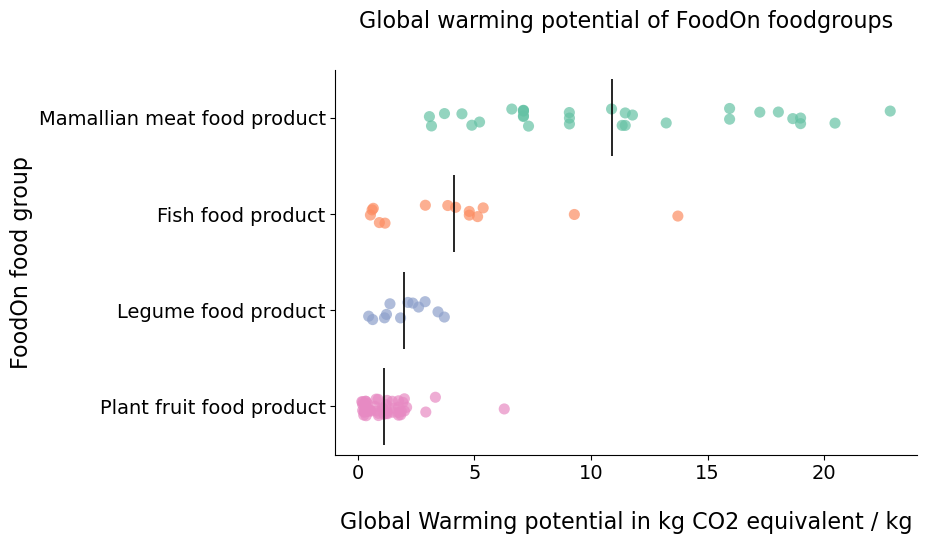

In [5]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
# figure impact 
import seaborn as sns

from local_path import path_figure_4b

order = ['Mamallian meat food product', 'Fish food product', 'Legume food product', 'Plant fruit food product'] 

palette = sns.color_palette("Set2")
palette_hex = [mcolors.rgb2hex(color) for color in palette][0:4] 
palette_hex

plt.figure(figsize =(7.5,5))
sns.stripplot(data=result_impact, y='grouplabel', hue = "grouplabel", x='value', 
              jitter= True, alpha =0.7, palette = "Set2", hue_order=order, order = order, size = 8)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1.2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=4,
            x="value",
            y="grouplabel",
            data=result_impact,
            showfliers=False,
            showbox=False,
            showcaps=False)

# Add titles and labels
sns.despine()
plt.title('Global warming potential of FoodOn foodgroups', pad = 30, fontsize = 16, ha = "center")
plt.xlabel('Global Warming potential in kg CO2 equivalent / kg', labelpad= 20, fontsize = 16, ha = "center")
plt.ylabel('FoodOn food group', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.show()
plt.savefig(path_figure_4b, format='svg',  bbox_inches="tight")
plt.savefig("figures/globalwarming_fig.svg", format='svg',  bbox_inches="tight")

#### protein content 

In [6]:
# Protein content
query_protein = open_query("queries/publication/protein_groups.rq")
result_protein = sparql_query_to_dataframe(query_protein, endpoint = endpoint)
result_protein["value"] = result_protein["value"].astype(float)
display(result_protein)

,grouplabel,foodname,nutrientclasslabel,value,unitlabel
0,Fish food product,Cod dried salted,Protein total,82.0,g
1,Mamallian meat food product,Beef salted dried Surinam,Protein total,65.0,g
2,Mamallian meat food product,Pork stewing meat prepared,Protein total,37.4,g
3,Mamallian meat food product,Pork gammon steak prepared,Protein total,37.1,g
4,Mamallian meat food product,Pork shoulder chop prepared,Protein total,37.1,g
...,...,...,...,...,...
403,Plant fruit food product,Apple sauce tinned,Protein total,0.2,g
404,Plant fruit food product,Apple sauce wo sugar tinned,Protein total,0.2,g
405,Plant fruit food product,Apple wo skin av,Protein total,0.2,g
406,Plant fruit food product,Pear w skin,Protein total,0.2,g


In [9]:
#Sanity check what kind of plant food products are high in protein
result_protein[(result_protein["value"] > 10) & (result_protein["grouplabel"] == "Plant fruit food product")]

,grouplabel,foodname,nutrientclasslabel,value,unitlabel
205,Plant fruit food product,Goji berries dried,Protein total,14.3,g
208,Plant fruit food product,Tomato sun-dried,Protein total,14.1,g
224,Plant fruit food product,Chilli powder,Protein total,12.0,g
226,Plant fruit food product,Pepper red cayenne,Protein total,12.0,g


In [ ]:
# quartile calculation for (first quartile , mean, third quartile)
iqr_table = result_protein.groupby(["grouplabel"])["value"].apply(calculate_iqr)
pd.DataFrame(iqr_table)

,value
grouplabel,
Fish food product,"(17.6, 21.4, 23.8)"
Legume food product,"(4.4, 10.1, 14.6)"
Mamallian meat food product,"(16.8, 21.5, 25.8)"
Plant fruit food product,"(0.5, 1.5, 1.3)"


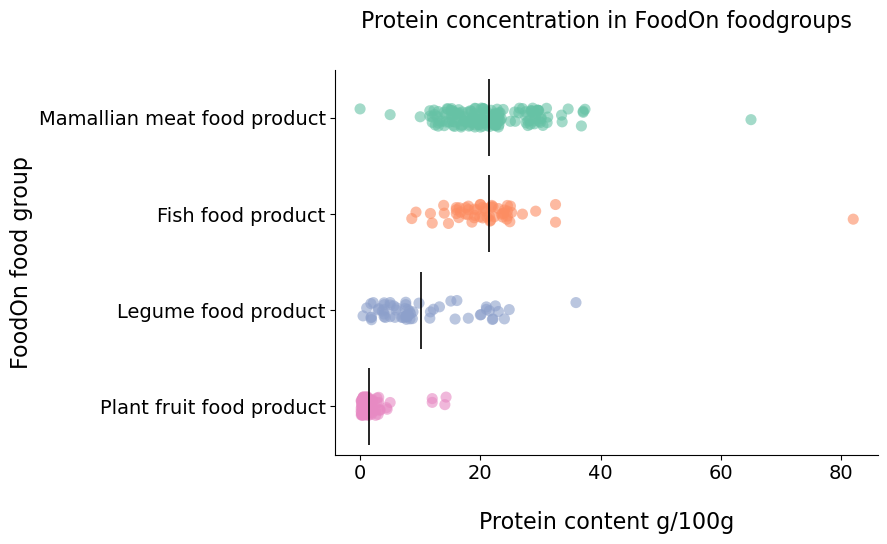

In [11]:
import matplotlib.pyplot as plt
# figure impact 
import seaborn as sns

from local_path import path_figure_4a

order = ['Mamallian meat food product', 'Fish food product', 'Legume food product', 'Plant fruit food product'] 

plt.figure(figsize =(7,5))
sns.stripplot(data=result_protein, y='grouplabel', hue = "grouplabel", x='value', 
              jitter= True, alpha =0.6, palette = "Set2", hue_order = order, order = order, size = 8)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1.2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=4,
            x="value",
            y="grouplabel",
            data=result_protein,
            showfliers=False,
            showbox=False,
            showcaps=False)
# Add titles and labels

sns.despine()

# Add titles and labels
plt.title('Protein concentration in FoodOn foodgroups', pad = 30, fontsize = 16, ha = "center")
plt.xlabel('Protein content g/100g',  labelpad= 20, fontsize = 16)
plt.ylabel('FoodOn food group',  fontsize = 16)
# plt.tight_layout()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.show()
plt.savefig(path_figure_4a, format='svg',  bbox_inches="tight")
plt.savefig("figures/protein_conc_fig.svg")

#### heavy metals

In [12]:
query_metal = open_query("queries/publication/heavy_metals_groups.rq")
result_metal = sparql_query_to_dataframe(query_metal, endpoint = endpoint)
result_metal["value"] = result_metal["value"].astype(float)
display(result_metal)

,grouplabel,foodname,propertylabel,value,unitlabel
0,Legume food product,PEANUT,MERCURY (TOTAL),0.001650,MG/KG
1,Legume food product,LEGUME (FRESH),MERCURY (TOTAL),0.000500,MG/KG
2,Legume food product,PEA (WITHOUT POD),MERCURY (TOTAL),0.007500,MG/KG
3,Legume food product,PEAS (WITH PODS),MERCURY (TOTAL),0.001288,MG/KG
4,Legume food product,PEA (DRY HARVESTED),MERCURY (TOTAL),0.003425,MG/KG
...,...,...,...,...,...
368,Plant fruit food product,"CARAMBOLA, STERVRUCHT",ARSENIC,0.001750,MG/KG
369,Plant fruit food product,PEACH,ARSENIC,0.007500,MG/KG
370,Plant fruit food product,NECTARINE,ARSENIC,0.007500,MG/KG
371,Plant fruit food product,APRICOT,ARSENIC,0.001750,MG/KG


In [14]:
# quartile calculation for (first quartile , mean, third quartile)
iqr_table = result_metal.groupby(["grouplabel","propertylabel"])["value"].apply(calculate_iqr)
pd.DataFrame(iqr_table)

value
grouplabel               propertylabel                   
Fish food product        ARSENIC          (0.6, 1.9, 2.5)
                         CADMIUM          (0.0, 0.0, 0.0)
                         LEAD             (0.0, 0.0, 0.0)
                         MERCURY (TOTAL)  (0.0, 0.1, 0.1)
                         NICKEL           (0.0, 0.0, 0.0)
Legume food product      ARSENIC          (0.0, 0.0, 0.0)
                         CADMIUM          (0.0, 0.0, 0.0)
                         LEAD             (0.0, 0.0, 0.0)
                         MERCURY (TOTAL)  (0.0, 0.0, 0.0)
                         NICKEL           (0.2, 2.0, 3.4)
Plant fruit food product ARSENIC          (0.0, 0.0, 0.0)
                         CADMIUM          (0.0, 0.0, 0.0)
                         LEAD             (0.0, 0.0, 0.0)
                         MERCURY (TOTAL)  (0.0, 0.0, 0.0)
                         NICKEL           (0.0, 0.1, 0.1)

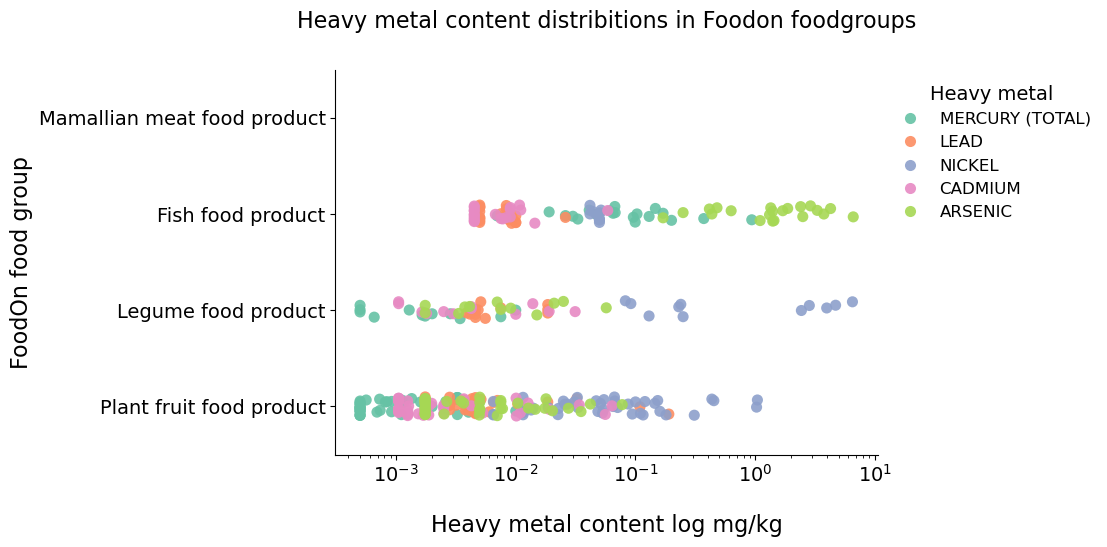

In [15]:
import matplotlib.pyplot as plt
# figure heavy metals
import seaborn as sns

from local_path import path_figure_4c

plt.figure(figsize =(7,5))

p = sns.stripplot(data=result_metal, y='grouplabel', hue = "propertylabel", x='value', 
                  alpha =0.9, palette= "Set2", order = order, size = 8)

p.set(xscale = "log")


sns.despine()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Heavy metal',     fontsize=12,        
    title_fontsize=14,  frameon=False  ) 

# Add titles and labels
plt.title('Heavy metal content distribitions in Foodon foodgroups', pad = 30, fontsize = 16, ha = "center")
plt.xlabel('Heavy metal content log mg/kg',  labelpad= 20, fontsize = 16)
plt.ylabel('FoodOn food group',  fontsize = 16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(path_figure_4c, format='svg',  bbox_inches="tight")
plt.savefig("figures/heavy_metal_conc_fig.svg", format = "svg", bbox_inches = "tight")

#### Use-case 2: Personalized nutrition


In [16]:
endpoint = "http://localhost:3030/nice_food/sparql"
query_nut_allergy = open_query("queries/publication/personalized_nutrition_nut.rq")
result_nut_allergy = sparql_query_to_dataframe(query_nut_allergy, endpoint = endpoint)
display(result_nut_allergy)

,foodname,proteinvalue,nutunit,impactfoodname,roundedWarmingValue,impactunit,impactRoundProteinRatio
0,Wheat germ,31.0,g,wheat germ,0.95,kg CO2 eq,0.03
1,Breakfast cereal porridge Olvarit fijne granen...,12.4,g,breakfast cereal cornflakes,0.78,kg CO2 eq,0.06
2,Breakfast cereal All-Bran Plus Kellogg's,14.0,g,breakfast cereal cornflakes,0.78,kg CO2 eq,0.06
3,Oatmeal,12.8,g,oatmeal,0.96,kg CO2 eq,0.07
4,Sesame seeds,26.0,g,sesame seed,2.19,kg CO2 eq,0.08
5,Linseeds,19.0,g,linseeds,1.86,kg CO2 eq,0.1


#### Use-case 3, infer knowledge on similar items

In [ ]:
endpoint = "http://localhost:3030/nice_food/sparql"
query = open_query("queries/publication/taxons_available.rq")
results_taxons = sparql_query_to_dataframe(query, endpoint = endpoint)
# Query takes a long time 

In [17]:
endpoint = "http://localhost:3030/nice_food/sparql"
query = open_query("queries/publication/usecase3_glycine.rq")
results_glycine = sparql_query_to_dataframe(query, endpoint = endpoint)
results_glycine = results_glycine[results_glycine["classlabel"] == "soybean seed (field) food product"]
results_glycine = results_glycine.dropna()
results_glycine

,ncbilabel,class,classlabel,queryclasslabel,datasetlabel,dataavailable
0,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,tofu food product,tahoe soya curd,LCA data available
4,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soy yogurt,Yoghurt soybased w fruit/vanilla,Nutrient data available
5,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soy yogurt,Yoghurt soybased unsweetened,Nutrient data available
6,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soy yogurt,Yoghurt soybased,Nutrient data available
7,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,tempeh,Tempeh fermented soya beans prepared wo fat,Nutrient data available
8,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soy yogurt,Tahoe soya curd,Nutrient data available
9,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soybean,SOY BEAN,Chemical foodsafety data available
10,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,miso,Miso soya paste,Nutrient data available
11,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soybean flour,Flour soya full fat,Nutrient data available
12,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soybean flour (defatted),Flour soya defatted,Nutrient data available


In [18]:
endpoint = "http://localhost:3030/nice_food/sparql"
query = open_query("queries/publication/usecase3_annuus.rq")
results_helianthus = sparql_query_to_dataframe(query, endpoint = endpoint)
results_helianthus = results_helianthus.dropna()
results_helianthus

,ncbilabel,class,classlabel,queryclasslabel,datasetlabel,dataavailable
0,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00002294,sunflower food product,sunflower seed oil,sunflower oil,LCA data available
1,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00002294,sunflower food product,sunflower seed oil,SUNFLOWER OIL,Chemical foodsafety data available
2,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00002294,sunflower food product,sunflower seed (whole kernel),SUNFLOWER KERNEL,Chemical foodsafety data available
3,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00002294,sunflower food product,sunflower seed oil,Oil sunflower seed,Nutrient data available


In [19]:
final_usecase = pd.concat([results_glycine, results_helianthus])
final_usecase = final_usecase[["ncbilabel", "classlabel", "queryclasslabel", "datasetlabel", "dataavailable"]]
final_usecase

,ncbilabel,classlabel,queryclasslabel,datasetlabel,dataavailable
0,Glycine max,soybean seed (field) food product,tofu food product,tahoe soya curd,LCA data available
4,Glycine max,soybean seed (field) food product,soy yogurt,Yoghurt soybased w fruit/vanilla,Nutrient data available
5,Glycine max,soybean seed (field) food product,soy yogurt,Yoghurt soybased unsweetened,Nutrient data available
6,Glycine max,soybean seed (field) food product,soy yogurt,Yoghurt soybased,Nutrient data available
7,Glycine max,soybean seed (field) food product,tempeh,Tempeh fermented soya beans prepared wo fat,Nutrient data available
8,Glycine max,soybean seed (field) food product,soy yogurt,Tahoe soya curd,Nutrient data available
9,Glycine max,soybean seed (field) food product,soybean,SOY BEAN,Chemical foodsafety data available
10,Glycine max,soybean seed (field) food product,miso,Miso soya paste,Nutrient data available
11,Glycine max,soybean seed (field) food product,soybean flour,Flour soya full fat,Nutrient data available
12,Glycine max,soybean seed (field) food product,soybean flour (defatted),Flour soya defatted,Nutrient data available
